# What will be predicted score if a student study for 9.25 hrs in a day??

In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#importing the data as Pandas Dataframe
df = pd.read_csv('./sparkstak1.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
print("Average Score: " , sum(df.Scores)/len(df.Scores))

Average Score:  51.48


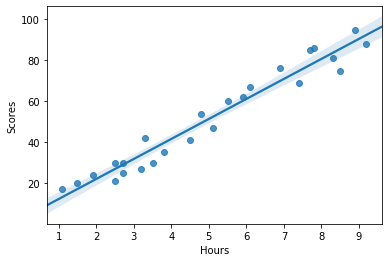

In [4]:
#A simple plot to study data dependecies
sns.regplot(x = df.Hours , y=df.Scores)

In [5]:
#X is the feature while y is the label being predicted
X = df.Hours.values.reshape(-1,1)
y = df.Scores.values.reshape(-1,1)

In [6]:
#splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
#Training the model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
print(reg_model.intercept_)
print(reg_model.coef_)

[2.82689235]
[[9.68207815]]


In [8]:
#run the model on test set
y_pred = reg_model.predict(X_test)

In [9]:
#Actual and Predicted values
df_pred = pd.DataFrame({'Hours':X_test.flatten(), 'Actual':y_test.flatten(), "Predicted": y_pred.flatten()})
df_pred['Difference'] = abs(df_pred['Actual'] - df_pred['Predicted'])
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
Hours         5 non-null float64
Actual        5 non-null int64
Predicted     5 non-null float64
Difference    5 non-null float64
dtypes: float64(3), int64(1)
memory usage: 288.0 bytes


In [10]:
#Now that we have our predicted y_pred and the original y_Test values
#We will check the Errors with our prediction
print('Mean Absolute Error: ' , metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ' , metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  3.9207511902099244
Mean Squared Error:  18.943211722315272
Root Mean Squared Error:  4.352380006653288


## Result

In [11]:
#FInally we predict the value asked in the Task 2
#What will be predicted score if a student study for 9.25 hrs in a day?
np_input = [[9.5]]
result = reg_model.predict(np_input)
print("The predicted score for 9.25hrs: ", result[0][0])

The predicted score for 9.25hrs:  94.80663482122885
